In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv(r"D:/Phishing_classifier_project/data/phising.csv")
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,1,-1,1,0,0,-1,-1,-1,0,1,1,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,1,-1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,1,1,1,0,1,-1,1,1,0,1,1,1,1,1,-1,0,-1,1,0,1,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [5]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

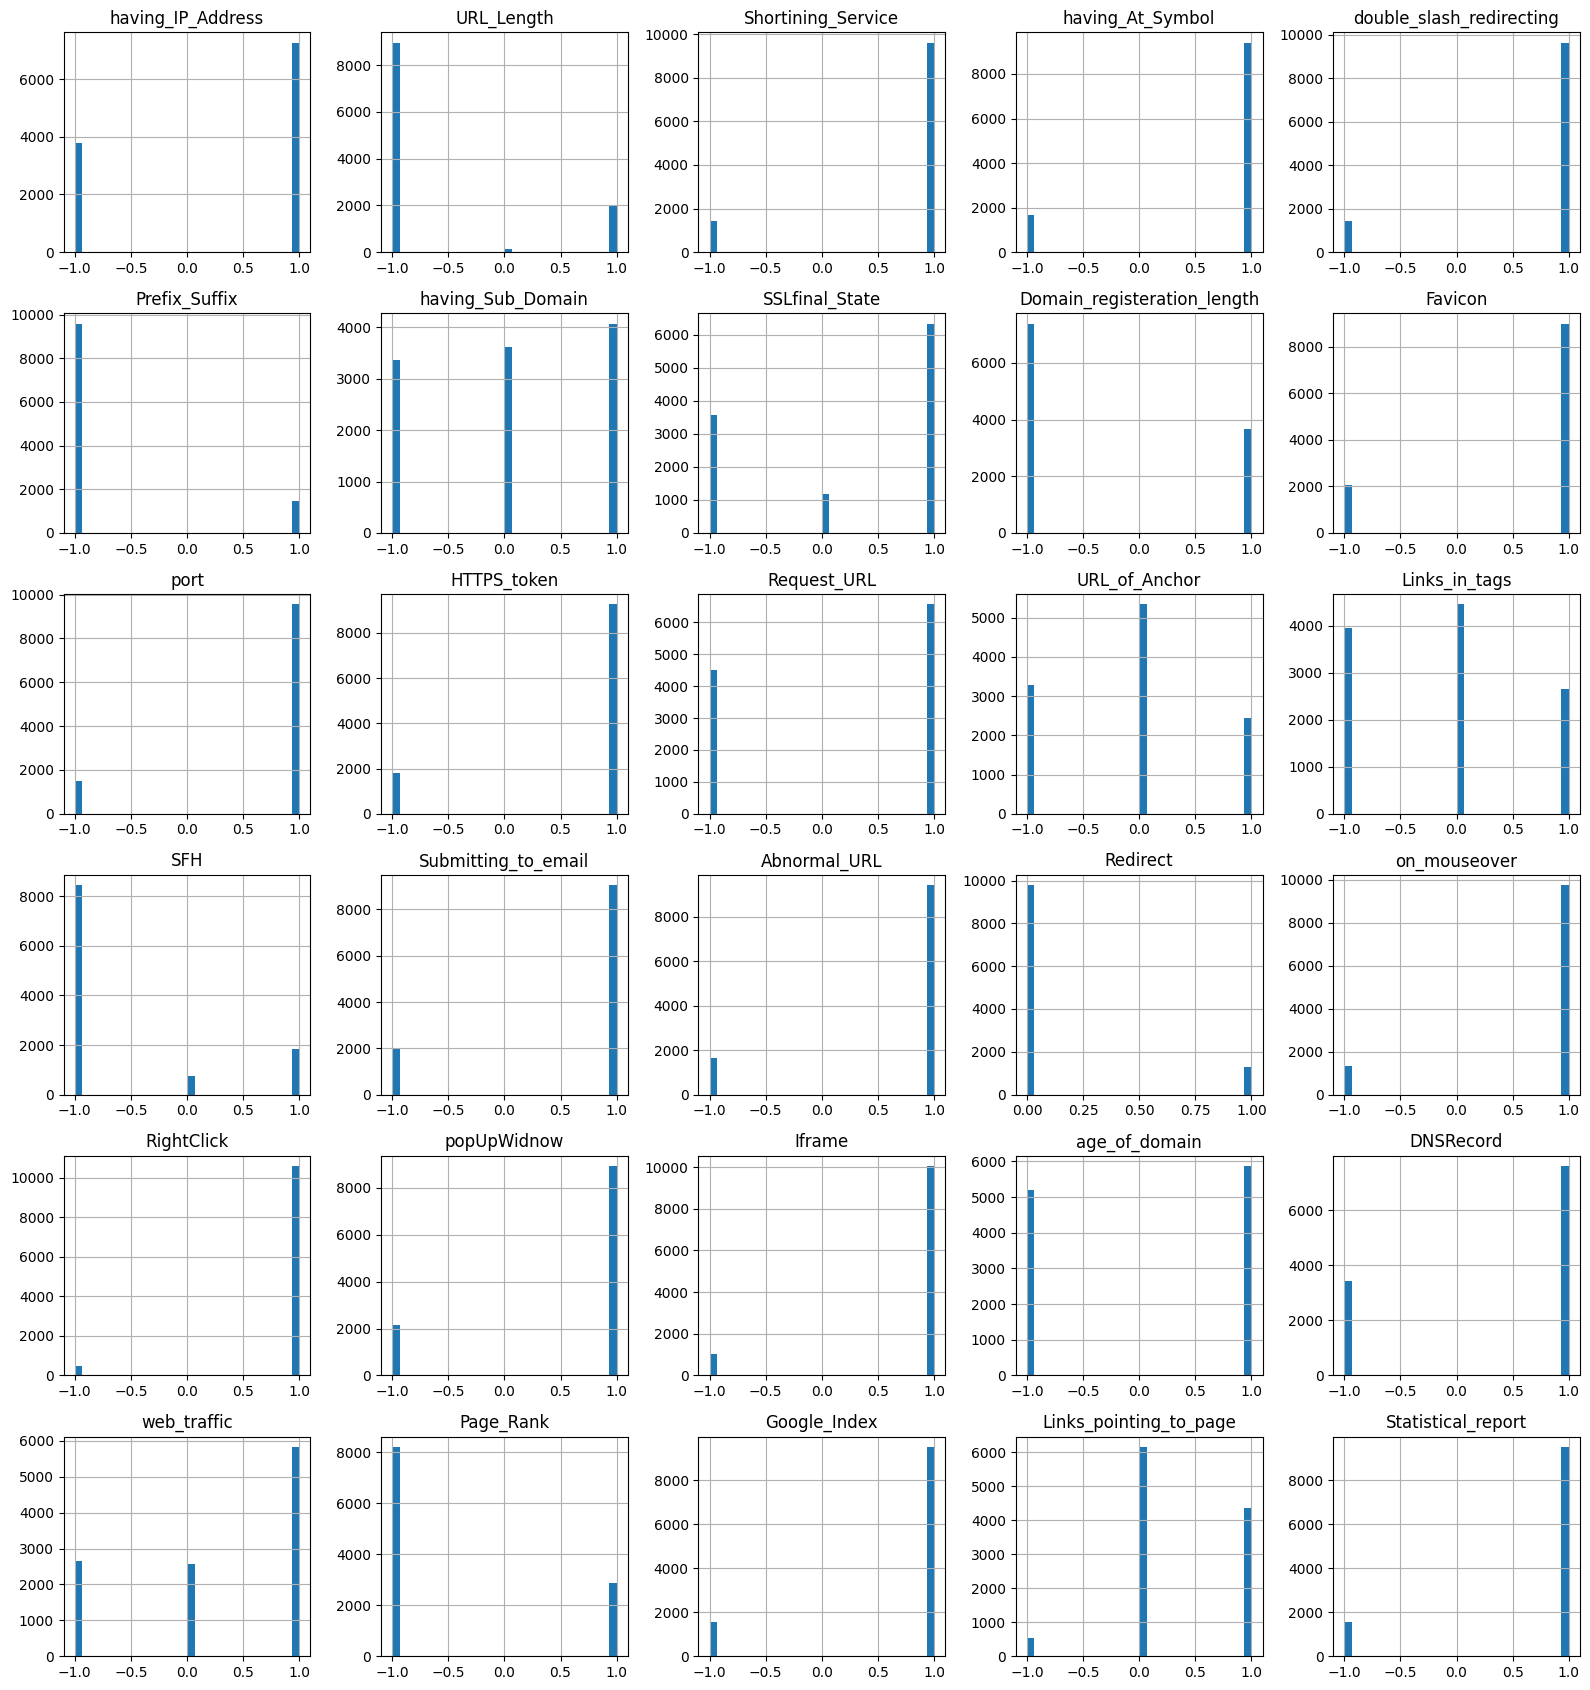

In [7]:
df.drop('Result', axis=1).hist(bins=30, figsize=(16, 17))
plt.tight_layout()
plt.show()

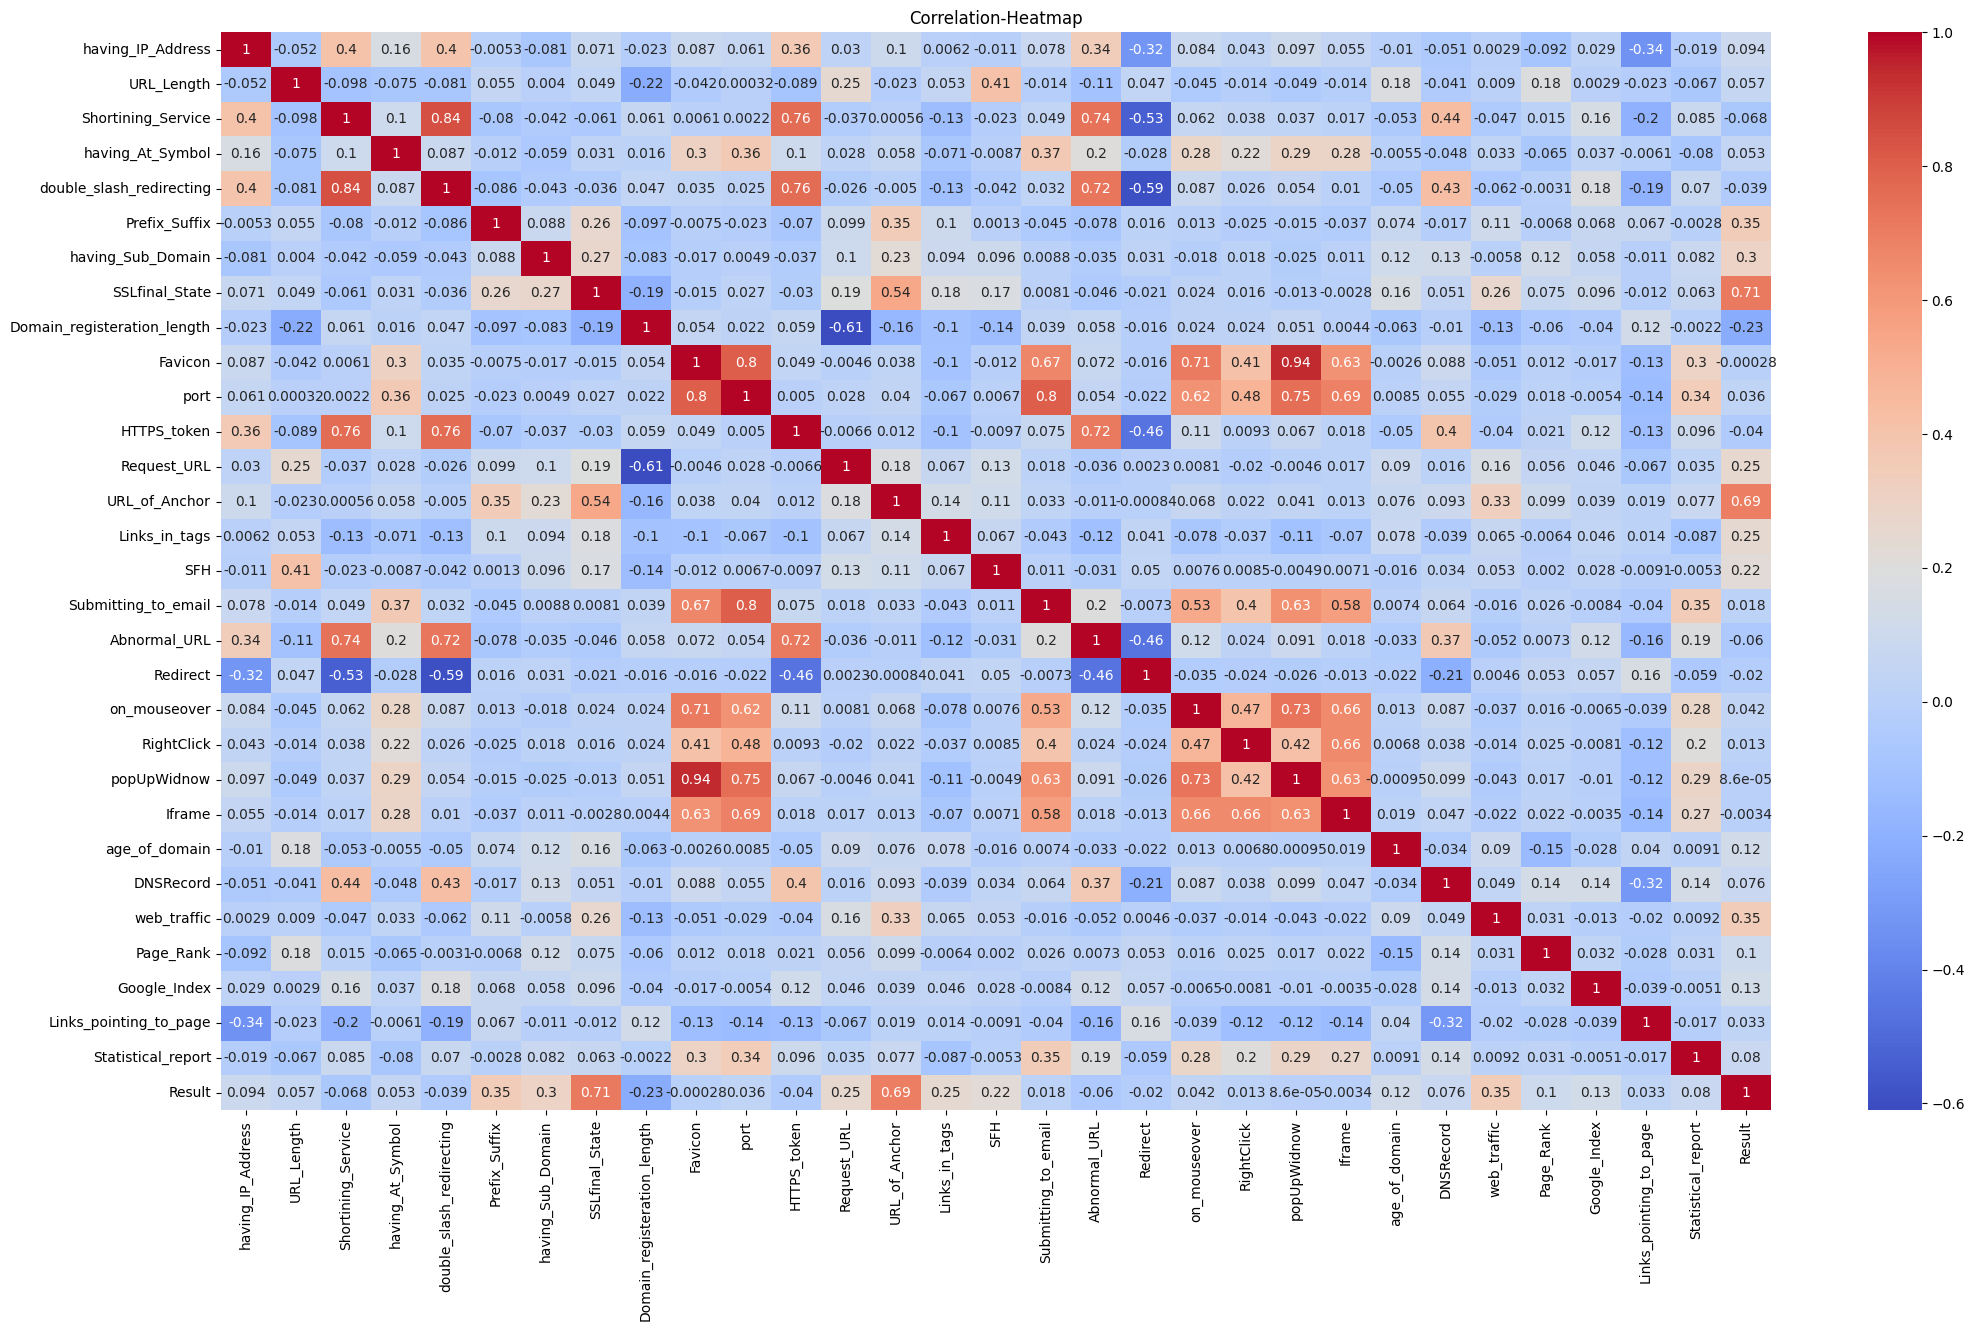

In [8]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr() ,annot=True, cmap='coolwarm')
plt.title('Correlation-Heatmap')
plt.show()

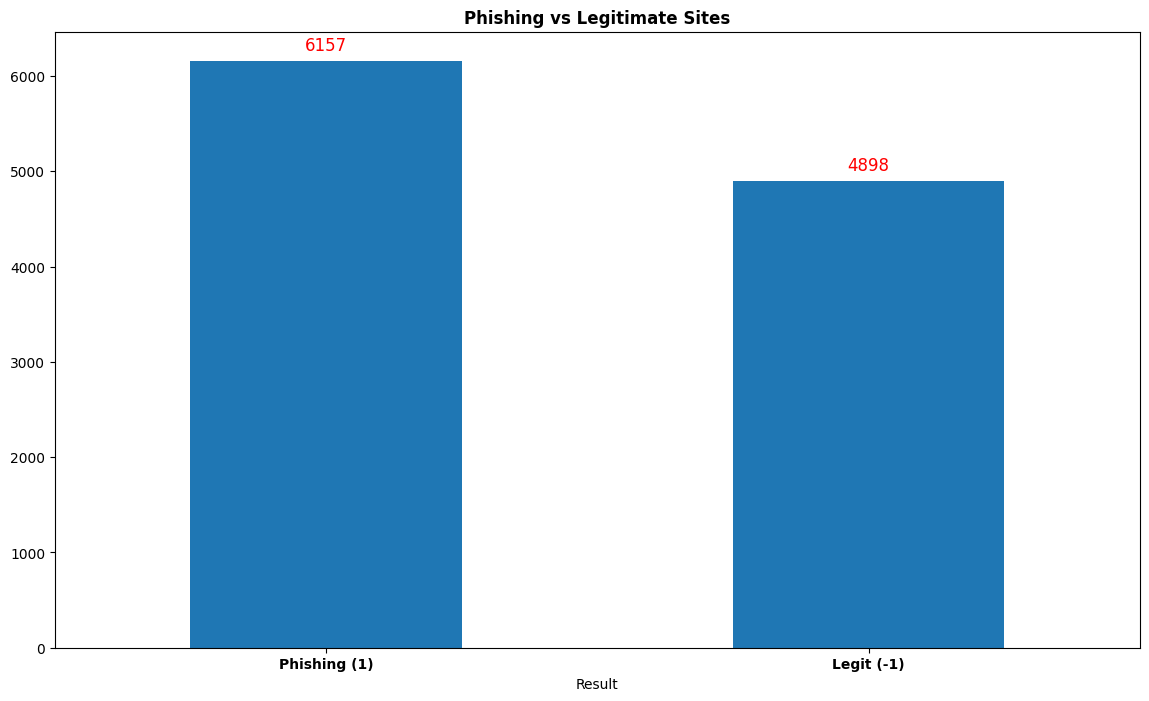

In [9]:
plt.figure(figsize=(14,8))
ax = df['Result'].value_counts().plot(kind='bar')

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width()/2
    ax.annotate(
        text = f'{int(height)}',
        xy=(x,height),
        xytext=(0,5),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=12,color='red'
    )


plt.title("Phishing vs Legitimate Sites", weight='bold')
plt.xticks(ticks=[0,1] ,labels=['Phishing (1)', 'Legit (-1)'], rotation=0, weight='semibold')
plt.show()


In [10]:
df.duplicated().sum()  # checking duplicates

np.int64(5206)

In [11]:
df.drop_duplicates(inplace=True)  # dropped duplicates
print('Remaining rows: ',df.shape[0])

Remaining rows:  5849


In [12]:
from sklearn.preprocessing import PowerTransformer


skewed = df.drop(['Result'], axis=1).skew()
high_skew = skewed[abs(skewed) > 0.5].index

print("Highlt Skewed Columns :\n", high_skew)


pt = PowerTransformer(method='yeo-johnson')
df[high_skew] = pt.fit_transform(df[high_skew])

Highlt Skewed Columns :
 Index(['URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'DNSRecord', 'Page_Rank',
       'Google_Index', 'Statistical_report'],
      dtype='object')


In [13]:
# calculating VIF to check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    X = add_constant(X)
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif.drop(0)

In [14]:
X = df.drop('Result', axis=1)
vif_cal = calculate_vif(X)
vif_cal.sort_values(by='VIF', ascending=False)

,Feature,VIF
10,Favicon,10.038804
22,popUpWidnow,8.945568
11,port,5.216631
5,double_slash_redirecting,4.101479
3,Shortining_Service,3.929997
17,Submitting_to_email,3.070762
23,Iframe,2.901976
18,Abnormal_URL,2.797487
12,HTTPS_token,2.741060
20,on_mouseover,2.683757


In [15]:
# dropping feature which have VIF > 5 , because they show strong multicollinearity

df.drop(columns=['Favicon','popUpWidnow','port'], axis=1, inplace=True)

In [ ]:
# defining outlier_detector func() to check the outliers

def outlier_detector(df, drop_cols=[]):
    outlier_summary = {}
    for col in df.columns:
        if col in drop_cols or df[col].dtype not in ['int64', 'float64']:
            continue

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_summary[col] = len(outliers)

    return pd.Series(outlier_summary).sort_values(ascending=False)


In [17]:
# Example usage:
outlier_counts = outlier_detector(df, drop_cols=['Result'])
print(outlier_counts)


Submitting_to_email            1243
having_At_Symbol               1203
URL_Length                     1171
HTTPS_token                    1013
Google_Index                    989
Abnormal_URL                    941
Statistical_report              886
double_slash_redirecting        824
Shortining_Service              818
on_mouseover                    810
Redirect                        771
Prefix_Suffix                   701
Iframe                          627
RightClick                      287
Request_URL                       0
having_IP_Address                 0
Domain_registeration_length       0
SSLfinal_State                    0
having_Sub_Domain                 0
Links_in_tags                     0
URL_of_Anchor                     0
SFH                               0
age_of_domain                     0
web_traffic                       0
DNSRecord                         0
Page_Rank                         0
Links_pointing_to_page            0
dtype: int64


# Many columns have much outliers, so we are clipping those to upper and lower boundary respectively, as we cant trim it, because we could lost much of data.

In [ ]:
# clipping outliers to IQR boundaries

def clip_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return series.clip(lower_bound,upper_bound)


In [ ]:
# high_outlier_cols : Are the columns which have outliers

high_outlier_cols = [
    'Submitting_to_email', 'having_At_Symbol', 'URL_Length',
    'HTTPS_token', 'Google_Index', 'Abnormal_URL',
    'Statistical_report', 'double_slash_redirecting',
    'Shortining_Service', 'on_mouseover', 'Redirect',
    'Prefix_Suffix', 'Iframe', 'RightClick'
]

for col in high_outlier_cols:
    df[col] = clip_iqr(df[col])


In [32]:
# dataset is split into X and Y

x = df.iloc[:,:-1]
y = df['Result'].replace(-1,0)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1, stratify=y)

In [34]:
x_train.shape, x_test.shape

((4386, 27), (1463, 27))

In [37]:
# testing all classification algorithms or models , which would gave us high accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



models = {
    'LogisticRegression' : LogisticRegression(),
    'Decision_Tree' : DecisionTreeClassifier(),
    'Random_Forest' : RandomForestClassifier(),
    'SVC' : SVC(),
    'Navie_bayes_gaussian' : GaussianNB(),
    'K_neighbors' : KNeighborsClassifier(),
    'xgboost' : XGBClassifier()
}

results = {}

for name , model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy : {acc:.4f}")




LogisticRegression Accuracy : 0.9036
Decision_Tree Accuracy : 0.9248
Random_Forest Accuracy : 0.9371
SVC Accuracy : 0.9241
Navie_bayes_gaussian Accuracy : 0.8913
K_neighbors Accuracy : 0.8947
xgboost Accuracy : 0.9392


# xgboost and RandomForest gave us almost equal accuracy, we will go with RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 150, 200, 300],
    'max_depth' : [5, 10, 20],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['sqrt']
}


rf = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator=rf, 
                    param_grid=param_grid,
                    cv=5, 
                    n_jobs=-1,
                    verbose=2 ,
                    scoring='accuracy')

fitted_model = grid_search.fit(x_train, y_train)

print("Best Parameters:\n", fitted_model.best_params_)
best_rf = fitted_model.best_estimator_



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters:
 {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [48]:
y_pred = best_rf.predict(x_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)*100:.2f}%")
print("\n\t\t\t Classification-report : \n\n", classification_report(y_test, y_pred))

Accuracy : 93.51%

			 Classification-report : 

               precision    recall  f1-score   support

           0       0.95      0.92      0.94       755
           1       0.92      0.95      0.93       708

    accuracy                           0.94      1463
   macro avg       0.94      0.94      0.94      1463
weighted avg       0.94      0.94      0.94      1463



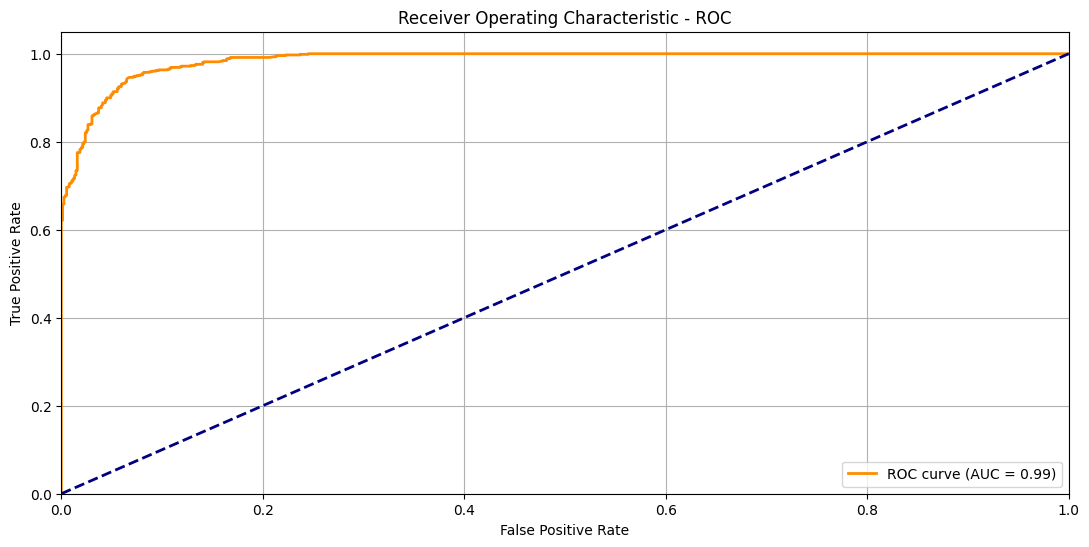

In [ ]:
# plotting roc-auc curve for metrics

from sklearn.metrics import  roc_curve, auc

y_prob =  best_rf.predict_proba(x_test)[:,1]

fpr, tpr, thresold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(13,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


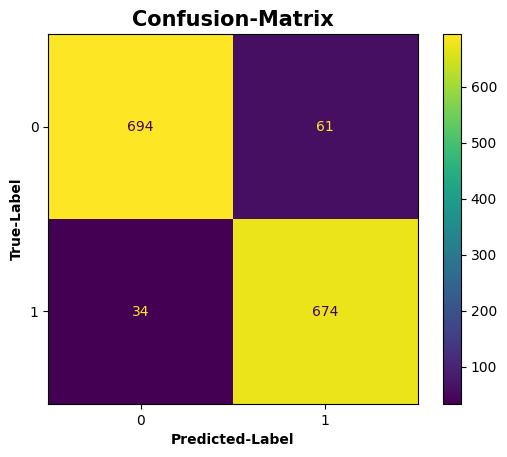

In [ ]:
# plotting confusion-Matrix for metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
cm_display.plot()
plt.title('Confusion-Matrix', fontsize=15, weight='bold')
plt.xlabel('Predicted-Label', fontsize=10, weight='semibold')
plt.ylabel('True-Label', fontsize=10, weight='semibold')
plt.show()

In [49]:
import joblib

joblib.dump(best_rf, 'random_forest_model.pkl')

['random_forest_model.pkl']